<a href="https://colab.research.google.com/github/dhiruvivek/Company-Bankruptcy/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Capstone Project - Supervised ML - Classification
##### **Contribution**    - Individual
##### **Name**           - Vivek Tripathi

# **GitHub Link -**

https://github.com/dhiruvivek/Company-Bankruptcy

# **Project Summary -**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who stand to lose money because of unpaid debts. Since computers can store huge data sets pertaining to bankruptcy, making accurate predictions from them beforehand is becoming important. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. In this project you will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Problem Statement**


The main objective is to analyze the dataset and build a predictive model by using various classification algorithms to predict bankruptcy of companies.

# **Main Library Used** : -  



*  Pandas for data manipulation, aggregation
*  Matplotlib and Seaborn for visualization and behavior with respect to the target variable

*   NumPy for computationally efficient operations
*   Scikit Learn for model training, model optimization, and metrics calculation

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read CSV File
url='/content/drive/MyDrive/Company Bankruptcy Classification ML Project/COMPANY BANKRUPTCY PREDICTION.csv'
df=pd.read_csv(url)

In [ ]:
#Top 5 rows of Dataset
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# **Dataset Description**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

Target Variable :

Bankrupt?: Class label 1 : Yes , 0: No

In [ ]:
#replacing spaces in columns

#replace white spaces by underscores
df.columns=[c.replace(' ', '_')for c in df]

#replace leading white spaces
df.columns=[c.lstrip() for c in df]

#replace trailing white spaces
df.columns=[c.rstrip() for c in df]

#replace leading white spaces by underscores
df.columns=['_' + c.lstrip() for c in df]

# **EDA**

In [ ]:
#Number of Rows and Columns in Dataset
df.shape

(6819, 96)

In [ ]:
#Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   _Bankrupt?                                                 6819 non-null   int64  
 1   __ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   __ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   __ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   __Operating_Gross_Margin                                   6819 non-null   float64
 5   __Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   __Operating_Profit_Rate                                    6819 non-null   float64
 7   __Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   __After-

In [ ]:
#Finding the Null Value in Datset
df.isnull().sum().sort_values(ascending=False).head()

_Bankrupt?                                                   0
__ROA(C)_before_interest_and_depreciation_before_interest    0
__Total_expense/Assets                                       0
__Total_income/Total_expense                                 0
__Retained_Earnings_to_Total_Assets                          0
dtype: int64

There are 0 null values in Dataset

In [ ]:
#Finding the Duplicate values
df.duplicated().sum()

0

There are 0 duplicate value found in Dataset.

<Axes: xlabel='_Bankrupt?', ylabel='count'>

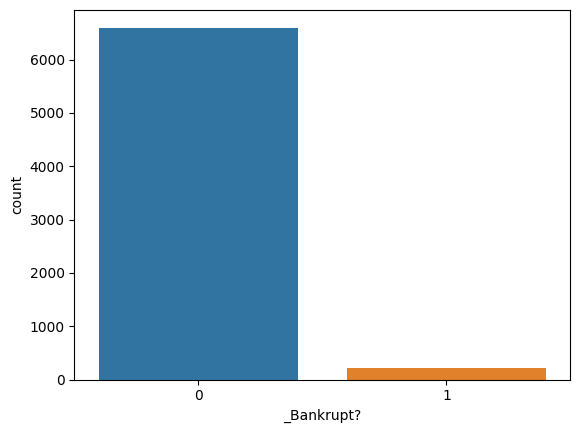

In [ ]:
#Finding bankrupt companies in Datset
sns.countplot(x='_Bankrupt?',data=df)

The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.

Through df.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [ ]:

numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['_Bankrupt?', '__Liability-Assets_Flag', '__Net_Income_Flag']

There are only 3 categorical columns. Lets explore these 3 columns 1st.

0    6811
1       8
Name: __Liability-Assets_Flag, dtype: int64


<Axes: xlabel='__Liability-Assets_Flag', ylabel='count'>

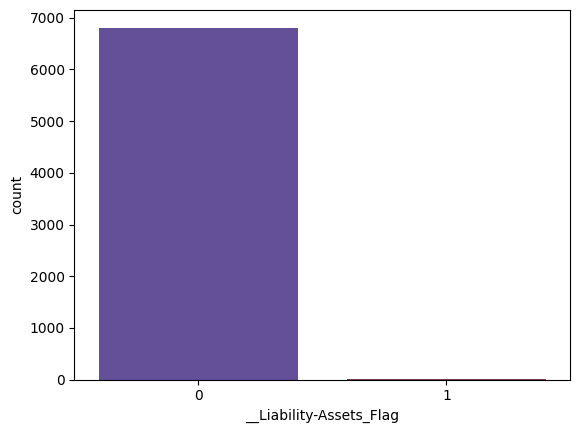

In [ ]:
#Plotting count of liability-assets flag
print(df['__Liability-Assets_Flag'].value_counts())
sns.countplot(x='__Liability-Assets_Flag',data=df,palette ='twilight')

The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

__Liability-Assets_Flag  _Bankrupt?
0                        0             6597
                         1              214
1                        1                6
                         0                2
dtype: int64


<Axes: xlabel='__Liability-Assets_Flag', ylabel='count'>

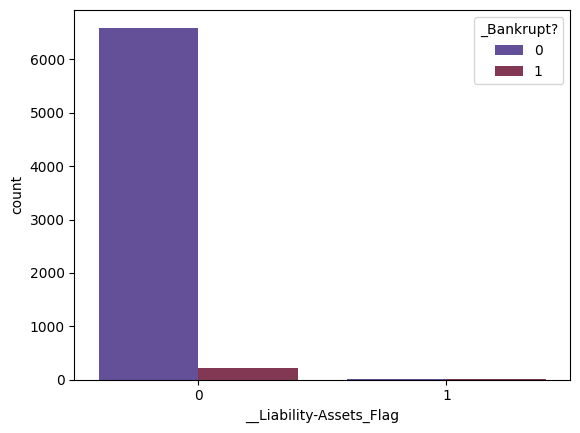

In [ ]:
#Finding bankrupt companies on the basis of liability-assets flag
print(df[['__Liability-Assets_Flag','_Bankrupt?']].value_counts())
sns.countplot(x = '__Liability-Assets_Flag',hue = '_Bankrupt?',data = df,palette = 'twilight')
     

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

1    6819
Name: __Net_Income_Flag, dtype: int64


<Axes: xlabel='__Net_Income_Flag', ylabel='count'>

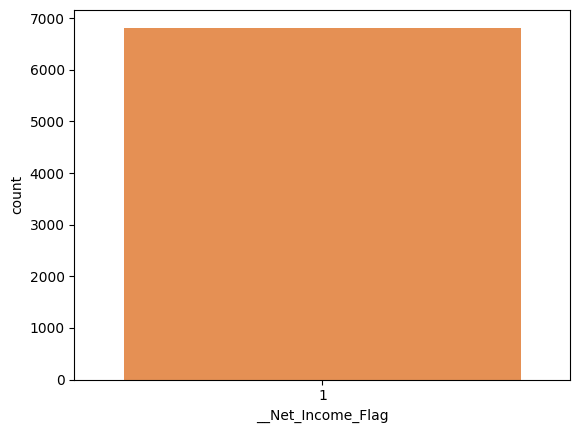

In [ ]:

#Plotting total count of net income flag
print(df['__Net_Income_Flag'].value_counts())
sns.countplot(x='__Net_Income_Flag',data=df,palette = 'Oranges')

The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

__Net_Income_Flag  _Bankrupt?
1                  0             6599
                   1              220
dtype: int64


<Axes: xlabel='__Net_Income_Flag', ylabel='count'>

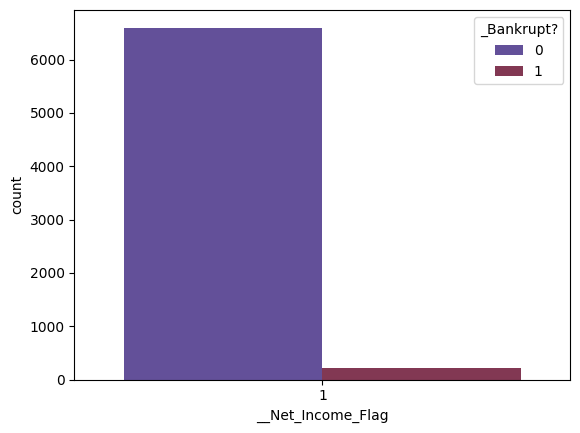

In [ ]:
#Finding bankrupt companies on the basis of net income flag
print(df[['__Net_Income_Flag','_Bankrupt?']].value_counts())
sns.countplot(x = '__Net_Income_Flag',hue = '_Bankrupt?',data = df,palette = 'twilight')

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

In [ ]:
#For the sake of simplicity, we analyze the six top positively and negatively correlated attributes

positive_corr = df[numeric_features].corrwith(df["_Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["_Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["_Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["_Bankrupt?"]].copy()

In [ ]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    colors=['rainbow', 'RdBu_r']
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df,palette = colors[value])

    plt.tight_layout(pad=0.5)

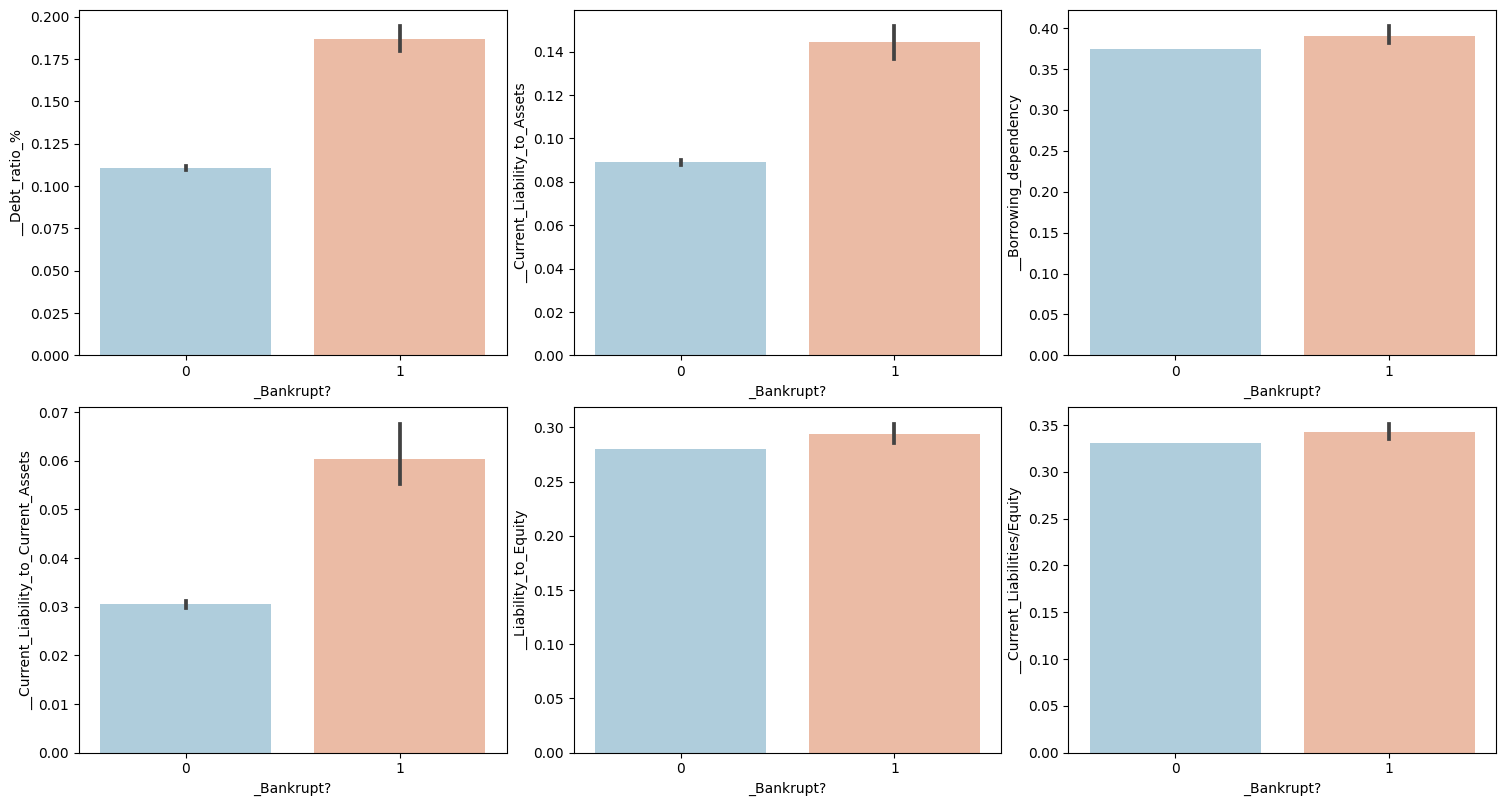

In [ ]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

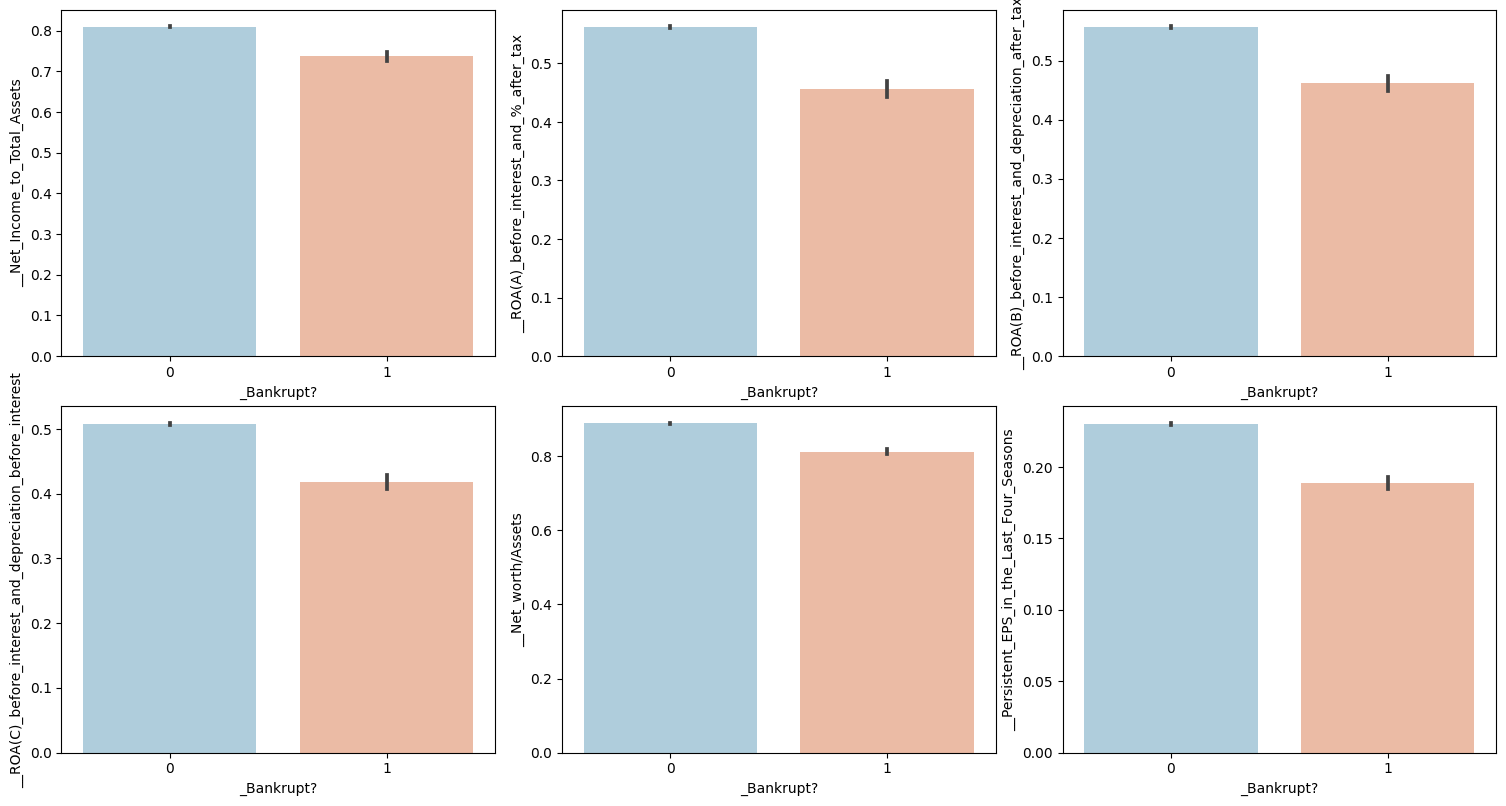

In [ ]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.

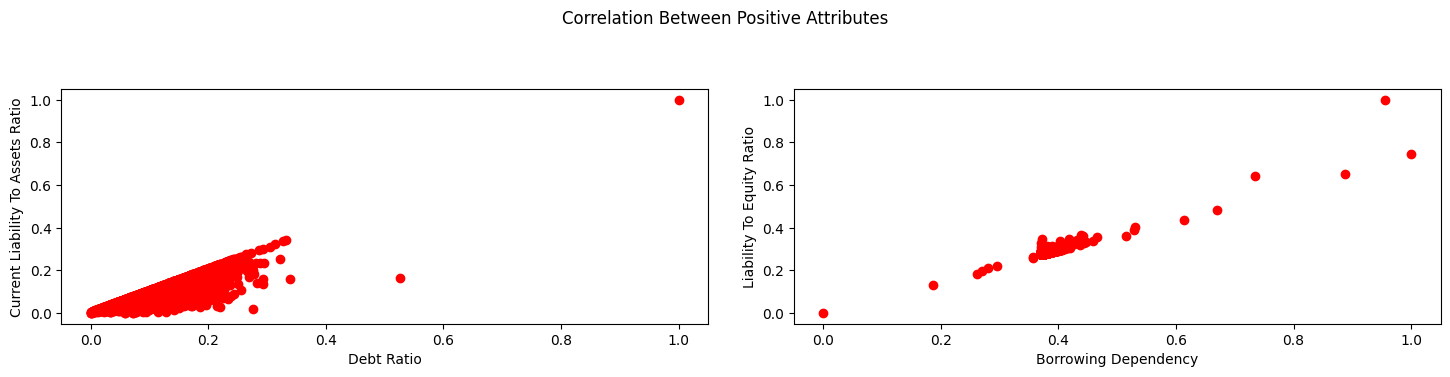

In [ ]:
#Let us check the relation of top six positive and negative correlation attributes among eachother
plt.figure(figsize=(15,4))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(df["__Debt_ratio_%"],df["__Current_Liability_to_Assets"], marker='o',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(df["__Borrowing_dependency"],df["__Liability_to_Equity"], marker='o',color = 'red')

plt.tight_layout(pad=2.5)

There is a positive relation between attributes that have a high correlation with the target attribute.

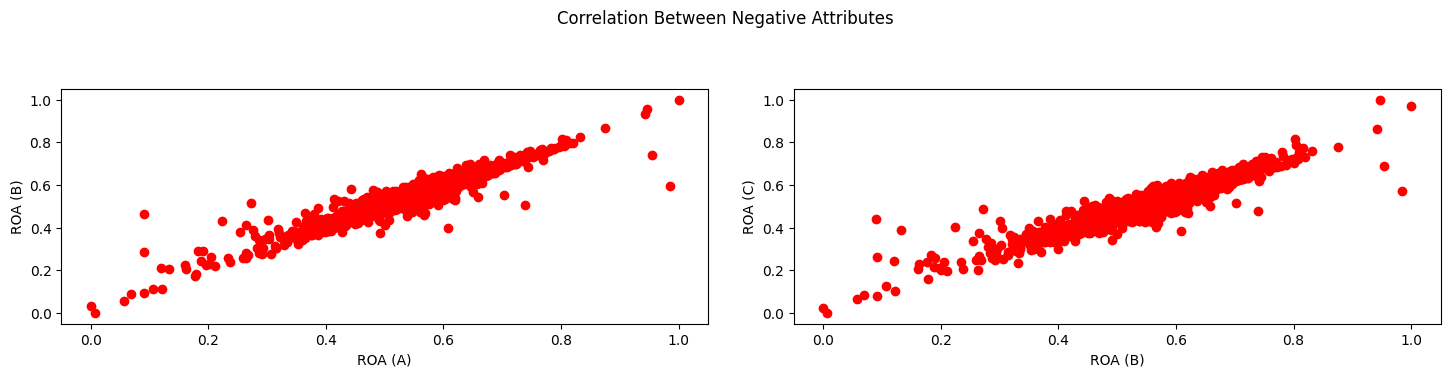

In [ ]:
plt.figure(figsize=(15,4))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
plt.scatter(df["__ROA(A)_before_interest_and_%_after_tax"],df["__ROA(B)_before_interest_and_depreciation_after_tax"], marker='o',color = 'red')


plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
plt.scatter(df["__ROA(A)_before_interest_and_%_after_tax"],df["__ROA(C)_before_interest_and_depreciation_before_interest"], marker='o',color = 'red')


plt.tight_layout(pad=2.5)

There is a positive relation between attributes that have a low correlation with the target attribute.